In [18]:
import numpy as np
import pandas as pd
import json
from sklearn.cluster import *
from scipy.cluster.hierarchy import dendrogram, linkage, to_tree
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [2]:
# Read in file
f = open("./embeddings.json", "r")
embeddings = json.load(f)
f.close()

In [3]:
vector_to_file = {}
vectors = []

for f in embeddings:
    vector_to_file[tuple(embeddings[f])] = f
    vectors.append(embeddings[f])

In [4]:
len(vectors)

594

In [6]:
clustering = AgglomerativeClustering().fit(vectors)

In [61]:
clustering.centroids_

AttributeError: 'AgglomerativeClustering' object has no attribute 'centroids_'

In [14]:
linked = linkage(vectors, 'single')
linked

array([[3.77000000e+02, 4.15000000e+02, 1.16564054e-01, 2.00000000e+00],
       [3.91000000e+02, 4.30000000e+02, 1.54579853e-01, 2.00000000e+00],
       [2.04000000e+02, 5.95000000e+02, 1.56851758e-01, 3.00000000e+00],
       ...,
       [1.32000000e+02, 1.18300000e+03, 6.65049684e-01, 5.92000000e+02],
       [3.70000000e+01, 1.18400000e+03, 6.77582373e-01, 5.93000000e+02],
       [1.66000000e+02, 1.18500000e+03, 6.89411530e-01, 5.94000000e+02]])

In [40]:
linked.shape

(593, 4)

In [57]:
rootnode, nodelist = to_tree(linked, rd=True)

/Users/kaanankharwa/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/kaanankharwa/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128140 (\N{LOVE LETTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


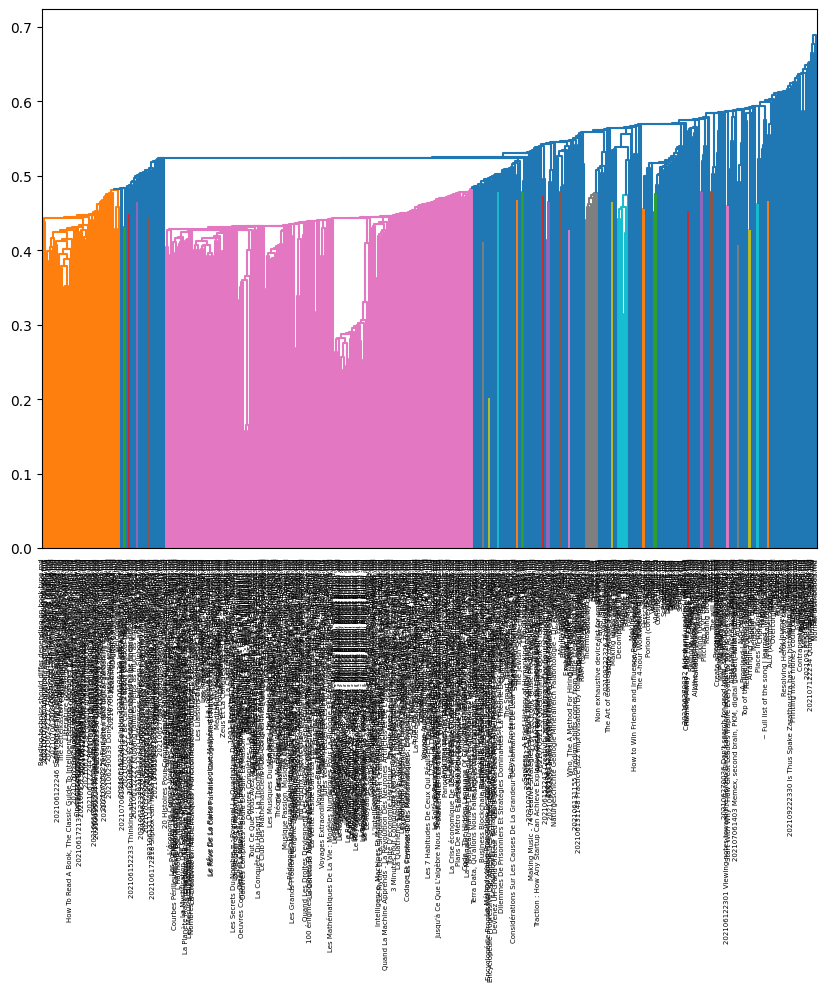

In [41]:
vectors_names = [vector_to_file[tuple(x)]for x in vectors]
plt.figure(figsize=(10, 7))
dgram = dendrogram(linked,
            orientation='top',
            labels=vectors_names,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()


In [54]:
class myNode:

   def __init__(self):
        self.files= []
        self.left = None
        self.right = None

In [60]:
def traverse_CF_tree(tree):
    if tree.is_leaf():
        return [vectors_names[tree.get_id()]]
    else:
        new_tree= []
        new_tree.append(traverse_CF_tree(tree.get_left()))
        new_tree.append(traverse_CF_tree(tree.get_right()))
        return new_tree

traverse_CF_tree(rootnode)

[['Normal distribution.md'],
 [['Somatosensory.md'],
  [['Wiring audio cables.md'],
   [['Rebound effect.md'],
    [['202107122234 Quadrivium and Trivium.md'],
     [['Biophilic design.md'],
      [['202109181532 Domestic Cozy.md'],
       [['Graph evolution.md'],
        [["Milgram's experience.md"],
         [[['Mel Spectogram.md'],
           [['AudioSet dataset.md'], ['Sound classification.md']]],
          [['Contrapuntal music (in film).md'],
           [[['Decision fatigue.md'], ['Ego depletion.md']],
            [['Nixie tubes.md'],
             [[['Hyperinflation.md'],
               ['Printing more money could create inflation.md']],
              [['Pygmalion effect.md'],
               [['202109222330 Is Thus Spake Zarathoustra has any historical fundements?.md'],
                [['Writing on Medium.md'],
                 [['Memex.md'],
                  [[['Freemium.md'], ['Newsletters.md']],
                   [['Resolving Heroku slug size problem.md'],
                 

In [66]:
def traverse_CF_tree2(tree):
    if tree.is_leaf():
        new_node= myNode()
        new_node.files.append(vectors_names[tree.get_id()])
        return new_node
    else:
        new_node=myNode()
        if tree.get_left() is not None:
            left = traverse_CF_tree2(tree.get_left())
            new_node.files += left.files
        if tree.get_right() is not None:
            right = traverse_CF_tree2(tree.get_right())
            new_node.files += right.files
        return new_node

In [68]:
my_node = traverse_CF_tree2(rootnode)

In [37]:
leafs = []
for x in node_list:
    if x.is_leaf():
        leafs.append(x.get_id())

In [155]:
def get_matches(data, labels, label):
    matches = []
    for i in range(len(labels)):
        if labels[i] == label:
            matches.append(data[i])
    return matches


def subcluster(data, thresh):
    clusters = []
    clustering =  DBSCAN(eps=thresh, min_samples=5).fit(data)
    labels = clustering.labels_
    print(pd.Series(labels).value_counts())
    if len(pd.Series(labels).unique()) == 1:
        for x in data:
            clusters.append(vector_to_file[tuple(x)])
    else:
        for x in pd.Series(labels).unique():
            print(x)
            # matches = pd.Series(labels) == x
            # new_cluster = pd.Series(data)[matches]
            new_cluster = get_matches(data, labels, x)
            if x == -1:
                new_cluster = [vector_to_file[tuple(y)] for y in new_cluster]
                #print(new_cluster)
                clusters.append(new_cluster)
            else:
                sub_clusters = subcluster(np.array([y for y in new_cluster]), thresh / 2)
                clusters.append(sub_clusters)
    return clusters

In [163]:
subcluster(vectors, .6)

 0    548
-1     39
 1      7
dtype: int64
0
-1    532
 0     16
dtype: int64
-1
0
-1    16
dtype: int64
-1
1
-1    7
dtype: int64


[[['Create a programming language.md',
   'Programming languages.md',
   'Inspectional reading.md',
   'Reading philosophy.md',
   'Reading imaginary.md',
   'Reading technics should differ depending on book type.md',
   'Elementary reading.md',
   'Re-reading books.md',
   'Evaluate a book.md',
   'Syntopical reading.md',
   'The four levels of reading.md',
   'Reading science and mathematics.md',
   'Speed reading.md',
   'Selective reading.md',
   'Reading history.md',
   'Reading biographies.md',
   'Reading digests.md',
   'Reading news.md',
   'Analytical reading.md',
   'Augmented reality.md',
   'AR devices.md',
   'Mixed reality.md',
   'No-code tools for AR.md',
   'Video.md',
   'Premiere Pro.md',
   'Make great videos.md',
   'Music theory.md',
   'One drop pattern.md',
   'Circle of fifth.md',
   'Harmonic Minor.md',
   'Chords progressions.md',
   'Working memory.md',
   'Hardware.md',
   'DSP (Digital Signal Processor).md',
   'Raspberry Pi.md',
   'ARM (Advanced RISC Ma